# Similarity Maps Examples

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit
print(rdkit.__version__)

2024.09.3


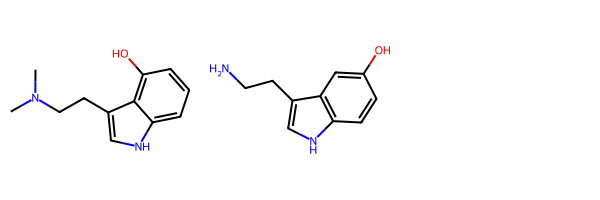

In [2]:
psilocin = Chem.MolFromSmiles("CN(C)CCc1c[nH]c2cccc(O)c12")
serotonin = Chem.MolFromSmiles("C1=CC2=C(C=C1O)C(=CN2)CCN")
Draw.MolsToGridImage((psilocin,serotonin))

In [3]:
def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

[17:35:46] DEPRECATION WARNING: please use MorganGenerator
[17:35:46] DEPRECATION WARNING: please use MorganGenerator


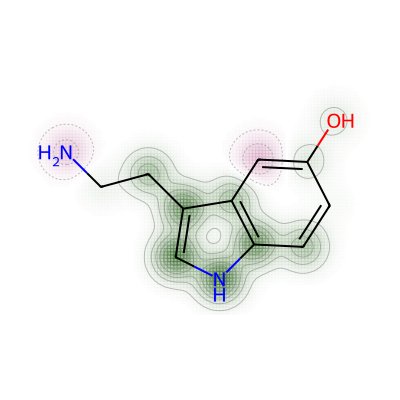

In [4]:
d = Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(psilocin, serotonin,
                                        lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'),
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())